# A/B Testing
## by Sindi Ingraham

### Project Background

Globox is an online marketplace that specializes in sourcing unique and high-quality products from around the world. Their logo **" We believe that shopping should be an adventure, and we want to bring the world to your doorstep. From exotic spices and rare teas to handmade jewelry and textiles, we have a curated selection of products that you won't find anywhere else"**.

GloBox is primarily known amongst its customer base for boutique fashion items and high-end decor products. However, their food and drink offerings have grown tremendously in the last few months, and the company wants to bring awareness to this product category to increase revenue.

The Growth team decides to run an A/B test that highlights key products in the food and drink category as a banner at the top of the website. The control group does not see the banner, and the test group sees it.


### The setup of the A/B test is as follows:

- The experiment is only being run on the mobile website.
- A user visits the GloBox main page and is randomly assigned to either the control or test group. This is the join date for the user.
- The page loads the banner if the user is assigned to the test group, and does not load the banner if the user is assigned to the control group.
- The user subsequently may or may not purchase products from the website. It could be on the same day they join the experiment, or days later. If they do make one or more purchases, this is considered a “conversion”.

### Task

Analyze the results of the A/B test and provide a recommendation to the stakeholders about whether Globox should launch the experience to all users.

### Stakeholders

- Growth Product & Engineering Team: This is the team that you work with at GloBox. The team is made up of a product manager, a user experience designer, an engineering manager and several software engineers, and you, the data analyst. The team develops features for the GloBox website that drive growth in users and revenue.
- Leila Al-Farsi, Product Manager, Growth: Leila is the product manager for the Growth product and engineering team. Alongside Alejandro, she leads the Growth team by deciding their goals and projects, measuring their success against defined KPIs, and communicating results to other company leaders like Mei.
- Alejandro Gonzalez, User Experience Designer, Growth: Alejandro is the designer for the Growth product and engineering team. He conducts user research and designed the experience that the A/B test is evaluating.
- Mei Kim, Head of Marketing: Mei oversees the Marketing team, which works on targeting audiences with effective marketing campaigns to drive customers to the GloBox website. She collaborates frequently with Leila and Alejandro to design website experiences that will align well with the current marketing efforts.

Together, Leila, Alejandro, and Mei will decide whether or not to launch the experiment based on the results.

### The Dataset

GloBox stores its data in a relational database, which I extracted using SQL queries. 

To consider:

- All users should be assigned to one A/B test group
- Not all users make a purchase.

![data description](data_image.png)

# Metric

- Revenue
- Conversion Rate = #converted / #converted + # notconverted



## Statistical Hypothesis

- Ho : CRcon = CRexp
- Ha : CRcon &ne; CRexp

- Ho : &mu;con = &mu;exp
- Ha: &mu;con &ne; &mu;exp

## Power Analysis

In this instance, power analysis was already conducted and the test data was readily available and extracted from the database. Nonetheless, I have established the confidence level and the significance level for the study.

- **Confidence Level**: 95%
- **Significance Level**: 5% or 0.05

## Minimum Detectable Effect

The targeted objective is to discern the magnitude of change between the new and old versions, as a basis for deciding whether to launch the new feature. Although the stakeholders did not provide a specific percentage, we have set a benchmark of a 2% change in conversion rate and revenue for this analysis, which will be assessed based on the average amount spent per user.

# Analyzing A/B test results

In [108]:
# Importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import ttest_ind
import scipy.stats as stats
from math import ceil


In [109]:
# Reading the data extrated from the database into pandas dataframe
ab = pd.read_csv('testingdata.csv')
ab.head()

,uid,group,join_date,date_of_purchase,amount_spent
0,1000000,B,2023-01-28,NaN,0.0
1,1000001,A,2023-01-27,NaN,0.0
2,1000002,A,2023-02-01,NaN,0.0
3,1000003,B,2023-01-25,NaN,0.0
4,1000004,A,2023-02-04,NaN,0.0


In [110]:
#Cheking the dataset
ab.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49082 entries, 0 to 49081
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               49082 non-null  int64  
 1   group             49082 non-null  object 
 2   join_date         49082 non-null  object 
 3   date_of_purchase  2233 non-null   object 
 4   amount_spent      49082 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


In [111]:
# Searching for duplicates

clean_dat = ab.copy()
data_count = clean_dat['uid'].value_counts(ascending = False)
duplicate = data_count[data_count > 1].count()
print(f'There are {duplicate} users that appear multiple times in the dataset')


There are 139 users that appear multiple times in the dataset


After identifying 139 duplicates in the dataset, it was determined that the impact of their removal would not significantly affect the results. Therefore, I proceed with deleting the duplicates from the dataset.

In [112]:
# Deleteing duplicates

clean_ab = df = clean_dat.drop(clean_dat[clean_dat.duplicated(subset='uid')].index)
print(clean_ab.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48943 entries, 0 to 49081
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               48943 non-null  int64  
 1   group             48943 non-null  object 
 2   join_date         48943 non-null  object 
 3   date_of_purchase  2094 non-null   object 
 4   amount_spent      48943 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ MB
None


## Convertion Rate

In order to gain insight from the same, I'll run some basic statistics and know what the sample looks like.


In [113]:
# Calculating convertion rate.
conversion_rates = clean_ab.groupby('group')['amount_spent'].apply(lambda x: (x > 0).mean())
print(conversion_rates)

# Calculating standard deviation.
std_deviation = clean_ab.groupby('group')['amount_spent'].std()
print(std_deviation)

# Calculating standard of error.
std_error = clean_ab.groupby('group')['amount_spent'].sem()
print(std_error)


group
A    0.039231
B    0.046301
Name: amount_spent, dtype: float64
group
A    24.758693
B    24.222659
Name: amount_spent, dtype: float64
group
A    0.158687
B    0.154438
Name: amount_spent, dtype: float64


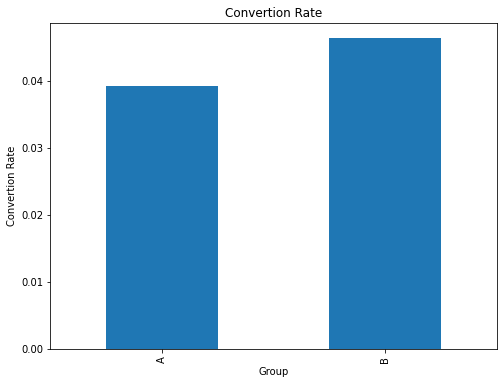

In [114]:
plt.figure(figsize=(8,6))
conversion_rates.plot(kind='bar')
plt.title('Convertion Rate')
plt.xlabel('Group')
plt.ylabel('Convertion Rate')
plt.savefig("convertionrate.png")
plt.show()

We can observe from the stats above that the treatment group perform slightly better with approximately 4.63% conversion rate that the control group with 3.92%. However, We have to identify if this results or difference is statistical significant.

- In order to test for a statistically significant difference between the control and treatment groups, I will utilize a two-sided Z-test for comparing proportions.

## Hypothesis

- Ho : CRcon = CRexp
- Ha : CRcon &ne; CRexp

- Ho: CRcon - CRexp = 0
- Ha : CRcon - CRexp &ne; 0



In [115]:
#Identifying how many users convert in each group

converted = clean_ab[clean_ab['amount_spent'] > 0]
num_converted = converted.groupby('group')['uid'].count()
print(num_converted)

# Number of sample in each group
clean_ab.groupby('group')['uid'].count()

group
A     955
B    1139
Name: uid, dtype: int64


group
A    24343
B    24600
Name: uid, dtype: int64

In [116]:
# Importing the neccesary modules to work with the normal distribution.
import math

# assigning each value to a variable to make the calculations easier.
x_control = 955 # number of users that made a purchase
N_control = 24343 # sample size for control group
p_hat_control = x_control / N_control # This is the proportion or convertion rate for the control group
z_score_A = 1.96

#Standard error
SE_A = math.sqrt(p_hat_control * (1- p_hat_control) / N_control)

#Confidence level for control group

ci_A = (p_hat_control - z_score_A * SE_A, p_hat_control + z_score_A *  SE_A)

print(f"Convertion rate control group:", np.round(p_hat_control,4))
print("Control group confidence Interval: ({:.4f}, {:.4f})".format(ci_A[0], ci_A[1]))
                 
                 

Convertion rate control group: 0.0392
Control group confidence Interval: (0.0368, 0.0417)


We can observe that the true convertion rate in the control group falls between (0.0368, 0.0417). The convertion rate for the control group is 0.0392, which falls within the confident interval indicating that the sample is representative of the population.

Now, let's calculate the confidence interval for the treatment group.

In [117]:
x_treat = 1139 # number of users that made a purchase in the treatment group
N_treat = 24600 # sample size fro treatment group
p_hat_treatment = x_treat / N_treat  # This is the proportion or convertion rate for the treatment group
z_score_B = 1.96

#Standard error
SE_B = math.sqrt(p_hat_treatment * (1- p_hat_treatment) / N_treat)

#Confidence level for control group

ci_B = (p_hat_treatment - z_score_B * SE_B, p_hat_treatment + z_score_B *  SE_B)

print(f"Convertion rate treatment group:", np.round(p_hat_treatment,4))
print("Treatment group confidence Interval: ({:.4f}, {:.4f})".format(ci_B[0], ci_B[1]))


Convertion rate treatment group: 0.0463
Treatment group confidence Interval: (0.0437, 0.0489)


The convertion rate for the treatment group is 0.0463 which falls within the confidence interval (0.0437, 0.0489) indicating that the sample is representative of the population. However, we still have to calculate the proportion difference to stablish if there is a statistical significance between the proportions.

In [118]:
# Importing the neccesary modules to work with the normal distribution.
from scipy.stats import norm

#Significance level
alpha = 0.05

# Now, I am going to calculate the proportion of the difference.
p_pooled = (x_control + x_treat) / (N_control + N_treat)
pooled_variance = p_pooled * (1-p_pooled) * (1/N_control + 1/N_treat) # Variance of the difference of the two groups

#Standard of error
SE = np.sqrt(pooled_variance)

#Test statistists
test_stat = (p_hat_treatment - p_hat_control)/ SE

# Critical value or z-score using the normal distribution
z_score = norm.ppf(1-alpha /2)

# Calculating the margin of error
ME = SE * z_score

#Calculating p-value
p_value = norm.sf(test_stat)*2 # We multiply here for 2 because we are using two sided test with normal distribution.

# Calculating confidence intervals
CI = [(p_hat_treatment - p_hat_control) - SE * z_score, (p_hat_treatment - p_hat_control) + SE * z_score]

if np.abs(test_stat) >= z_score:
    print("reject the null")
    print(np.round(p_value,4))
    
print("Test statistics stat: ", np.round(test_stat,4))
print("Z-Critical score: ", np.round(z_score,2))
print("P_value; ", np.round(p_value,4))
print("Confidence Interval of 2 sample for proportion: " , np.round(CI,4))

reject the null
0.0001
Test statistics stat:  3.8643
Z-Critical score:  1.96
P_value;  0.0001
Confidence Interval of 2 sample for proportion:  [0.0035 0.0107]


The test statistics (3.864) is greater than the z-critical score (1.96) and the p-value(0.0001) is less that the significance level of 0.05. This means that we have rejected the null hypothesis (that there is no difference between the proportions of the two groups) and we can conclude that there is a statistically significant difference between the two sample proportions.

Additionally, the confidence interval for the difference in proportions (0.0035, 0.0107) does not include zero, which further supports the conclusion that there is a significant difference between the two groups.

Now, let's visualize the convertion rate with the standard error.

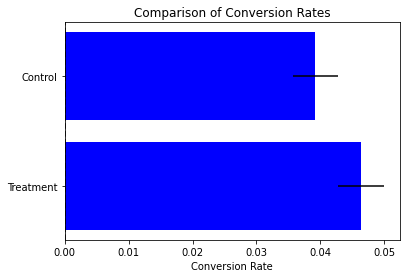

In [119]:
# Plot for the convertion rate and the standard error for each group.

groups = ['Control', 'Treatment']
conversion_rates = [p_hat_control, p_hat_treatment]
errors = [ME, ME]
fig, ax = plt.subplots()
y_pos = np.arange(len(groups))
ax.barh(y_pos, conversion_rates, xerr=errors, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(groups)
ax.invert_yaxis()
ax.set_xlabel('Conversion Rate')
ax.set_title('Comparison of Conversion Rates')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

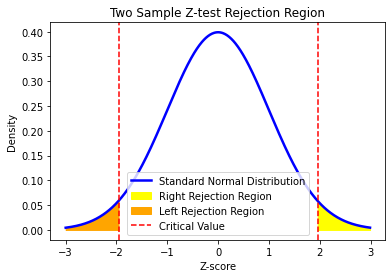

In [120]:
# visualizing the rejection region

z = np.arange(-3, 3, 0.01)
plt.plot(z, norm.pdf(z), label='Standard Normal Distribution', color='blue', linewidth=2.5)
plt.fill_between(z[z > z_score], norm.pdf(z[z > z_score]), label='Right Rejection Region', color='yellow')
plt.fill_between(z[z < -z_score], norm.pdf(z[z < -z_score]), label='Left Rejection Region', color='orange')
plt.axvline(x=z_score, color='red', linestyle='--', label='Critical Value')
plt.axvline(x=-z_score, color='red', linestyle='--')
plt.title("Two Sample Z-test Rejection Region")
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.show()

The above plot shows rejection region with a standard normal distribution where the rejection region is shaded in yelow and orange,and is separated from the acceptance region  by the critical value. This plot also shows PDF of the standard normal distribution, which represents the distribution of the test statistic under the null hypothesis.

After analyzing the conversion rate results and rejecting the null hypothesis, we will now proceed to examine the revenue or the average amount spent per user to determine the statistical significance of launching the new feature as part of our A/B testing objectives.

## Revenue 

group
A    3.374518
B    3.390867
Name: amount_spent, dtype: float64


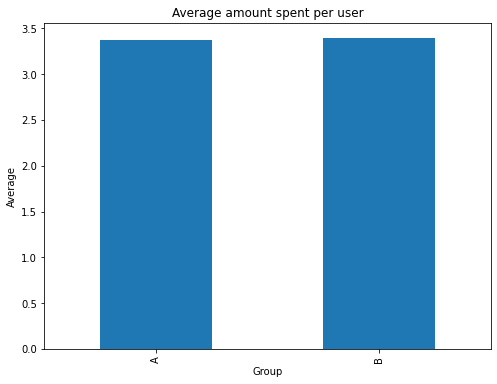

In [125]:
# calculating the average amount spent per user in eahc group. In this calculation I used the origal data since it is an average.
# In the proportion since we want to analyze which users actually converte, it was necessary to delete the duplicates.
amount_spent_user = ab.groupby(['group','uid'])['amount_spent'].sum().groupby('group').mean()
print(amount_spent_user)

plt.figure(figsize=(8,6))
amount_spent_user.plot(kind='bar')
plt.title('Average amount spent per user')
plt.xlabel('Group')
plt.ylabel('Average')
plt.savefig("average amount spent per user.png")
plt.show()

We can observe that the average amount spent per user in group b is slightly higher than group A with 3.391 and 3.375 respectivately. However, we cannot make any conslusions about whether this difference is statistically significant or not yet. So the next step is conduct a hypothesis test and calculate the confidence interval.


### Hypothesis

- Ho : &mu;con = &mu;exp
- Ha : &mu;con &ne; &mu;exp

- Ho: &mu;con - &mu;exp = 0
- Ha : &mu;con - &mu;exp &ne; 0

Let's calculate the confidence intervals for group A or control group.

In [122]:
# Importing the t stat since we are going to use t distribution for mean
from scipy.stats import t

#Subsetting the data to incluide only the control group
control = ab[ab['group']=='A']

#Calculating some statistics over control group

NC= control.shape[0]
sample_mean = control['amount_spent'].mean()
sample_std = control['amount_spent'].std()

#Calculating the standard error of the mean
SOE = sample_std / np.sqrt(NC)

#Claculating the t-critical value, in this case 95% confidence level
t_critical = t.ppf(0.975, NC-1)

#Margin of error
MOE = t_critical * SOE

#Confidence interval

CIC = (sample_mean - MOE, sample_mean + MOE)
print(f"Sample mean; {sample_mean:.2f}")
print(f"Sample standard deviation : {sample_std:.2f}")
print(f"Standard of error: {SOE:.2f}")
print(f"t-critical value: {t_critical:.2f}")
print(f"Margin of error: {MOE:.2f}")
print(f"95% Confidence Interval: {np.round(CIC, 3)}")
      

Sample mean; 3.37
Sample standard deviation : 25.37
Standard of error: 0.16
t-critical value: 1.96
Margin of error: 0.32
95% Confidence Interval: [3.048 3.685]


We can observe that the sample mean for group A or control group is 3.37, which is slightly lower than the sample mean for group B. With a confidence interval of [3.048 3.685] we can be reasonably confidence that the true population mean falls within this range. However, we need to calculate the confidence interval for group b to compare the two groups and draw any conclusion. We are going to do that next.

Note: Note that our sample mean does not fall within our confidence interval, which ww have to consider when drawing conclusions.

In [123]:
#Subsetting the data to incluide only the control group
treatment = ab[ab['group']=='B']

#Calculating some statistics over control group

NT= treatment.shape[0]
sample_mean_t = treatment['amount_spent'].mean()
sample_std_t = treatment['amount_spent'].std()

#Calculating the standard error of the mean
SET = sample_std_t / np.sqrt(NT)

#Claculating the t-critical value, in this case 95% confidence level
t_critical_t = t.ppf(0.975, NT-1)

#Margin of error
MET = t_critical * SET

#Confidence interval

CIT = (sample_mean_t - MET, sample_mean_t + MET)

print(f"Sample mean: {sample_mean_t:.3f}")
print(f"Sample standard deviation : {sample_std_t:.2f}")
print(f"Standard of error: {SET:.2f}")
print(f"t-critical value: {t_critical_t:.2f}")
print(f"Margin of error: {MET:.2f}")
print(f"95% Confidence Interval: {np.round(CIT, 3)}")

Sample mean: 3.380
Sample standard deviation : 24.79
Standard of error: 0.16
t-critical value: 1.96
Margin of error: 0.31
95% Confidence Interval: [3.071 3.689]


Here we can say with 95% confidence that the true population mean of the average amount spent per user falls within the interval of [3.071 3.689]. Notice that our sample mean falls within this range in the treatmen group. However, we are going to calculate the confidence interval and p-value of the difference of the mean to determinate whether there is a statistical significance.

In [124]:
# Calculating the confidence interval for the difference of mean using unequal variance and t-distribution

diff = sample_mean_t - sample_mean

#standard error of the difference
se_diff = np.sqrt((sample_std**2/len(control)) + (sample_std_t**2/len(treatment)))

#t-statistics and p-value
t_stat, p_value = ttest_ind(treatment['amount_spent'], control['amount_spent'], equal_var =False)

#Confidence interal for the difference
ci_low,ci_high = diff - 1.96 * se_diff,diff + 1.96 * se_diff

print(f"Difference in mean: {diff:.3f}")
print(F"95% Confidence Interval: {np.round(ci_low,3), np.round(ci_high, 3)}")
print(f"p-value:  {p_value: .3f}")

Difference in mean: 0.014
95% Confidence Interval: (-0.43, 0.457)
p-value:   0.952


We can observe that the difference in means is very small (0.014) and the confidence interval for this difference contains 0, which mean we fail to reject the null hypothesis. This imply hat the average amount spent per user is the same in both groups. Aditionally, the p-value 0.952 is greather than our significance level 0.05, this supports the conclusion that there is no statistically significant difference in the average amount spent per user. Therefore, it we consider only this metric, the new feature did not have a significant impact on the amount spend per user.

## Conclusion

- Based on the results of the A/B test, we can conclude that the new feature had a significant impact on the conversion rate, with the treatment group 4.63% conversion rate outperforming the control group 3.92%. However, when considering the average amount spent per user, there was no significant difference between the two groups.

- Given the targeted objective of a 2% change in conversion rate and revenue, it seems that the new feature has met this benchmark for conversion rate. However, the impact on revenue is unclear given the lack of difference in the average amount spent per user.


## Recommendation

We recommend further analysis to understand the impact of the new feature on revenue, such as examining customer behavior and engagement with the new feature. Based on this additional analysis, stakeholders can make an informed decision about whether to launch the experience to all users.